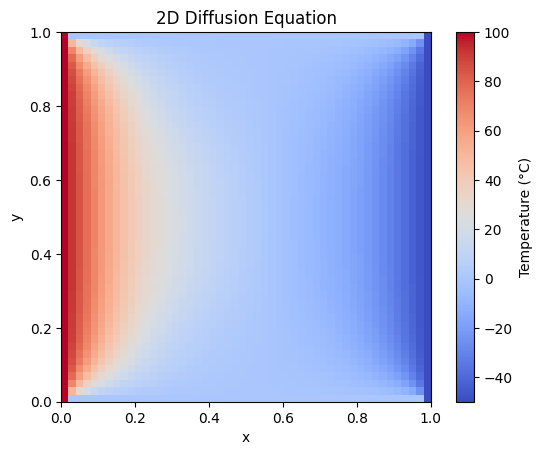

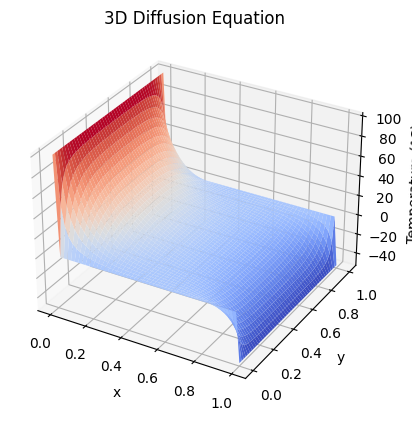

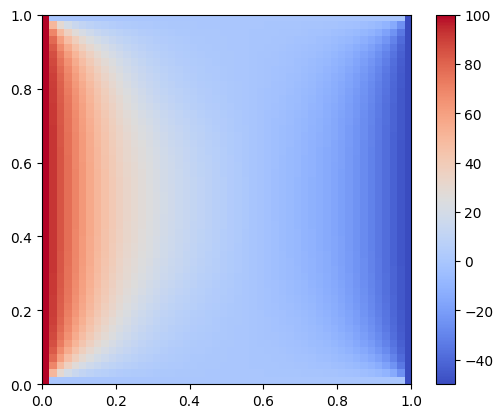

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D

# Define parameters
A = 0.1  # Diffusivity in the outer region
B = 0.6  # Diffusivity in the inner region
nx, ny = 50, 50  # Number of grid points
dx = 1.0 / (nx - 1)
dy = 1.0 / (ny - 1)
dt = 0.0001  # Time step
steps = 2000  # Number of time steps

# Initialize temperature field
T = np.zeros((nx, ny))
T[:, 0] = 100  # Left boundary condition
T[:, -1] = -50  # Right boundary condition

# Define regions
inner_start = int(nx * 0.25)
inner_end = int(nx * 0.75)

# Animation function
def update(T):
    T_new = T.copy()
    for i in range(1, nx-1):
        for j in range(1, ny-1):
            if inner_start <= i < inner_end and inner_start <= j < inner_end:
                K = B
            else:
                K = A
            T_new[i, j] = T[i, j] + K * dt * (
                (T[i+1, j] - 2*T[i, j] + T[i-1, j]) / dx**2 +
                (T[i, j+1] - 2*T[i, j] + T[i, j-1]) / dy**2
            )
    return T_new

# 2D plot
def plot_2D(T):
    plt.imshow(T, extent=[0, 1, 0, 1], origin='lower', cmap='coolwarm')
    plt.colorbar(label='Temperature (°C)')
    plt.title('2D Diffusion Equation')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

# 3D plot
def plot_3D(T):
    x = np.linspace(0, 1, nx)
    y = np.linspace(0, 1, ny)
    X, Y = np.meshgrid(x, y)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, T, cmap='coolwarm')
    ax.set_title('3D Diffusion Equation')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('Temperature (°C)')
    plt.show()

# Animation function
def animate_diffusion(T, steps):
    fig, ax = plt.subplots()
    cax = ax.imshow(T, extent=[0, 1, 0, 1], origin='lower', cmap='coolwarm')
    fig.colorbar(cax)
    
    def animate(i):
        global T
        T = update(T)
        cax.set_array(T)
        return cax,
    
    ani = animation.FuncAnimation(fig, animate, frames=steps, interval=50, blit=True)
    plt.show()

# Run the simulation and plot the results
for _ in range(steps):
    T = update(T)

# Plot the final results
plot_2D(T)
plot_3D(T)

# Animate the diffusion process
animate_diffusion(T, steps)
